You can follow along and play with this notebook by clicking the badge below

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COGS118A/demo_notebooks/blob/main/lecture_06_regression.ipynb)

In [20]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



# some utility functions to create toy data
# data ~ underlying function + gaussian noise

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size).reshape(-1, 1)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def a_sinusoidal_func(x):
    return np.sin(2 * np.pi * x)

def a_polynomial_func(x):
    return (12. - 6.14*x + 8.4*x*x)

def an_exp_func(x):
    return (1+1*np.exp(0.001*x))

def a_linear_func(x):
    return (1.17 + 3.14*x)

def a_discontinuous_func(x):
    return [ 1. if el>0.5 else 0. for el in x  ]
    
sample_size = 10
sigma = 0.3

func = a_sinusoidal_func
#func = a_polynomial_func
#func = a_discontinuous_func
#func = a_linear_func

np.random.seed(1234)

# this is the training set
x_train, y_train = create_toy_data(func, sample_size, sigma)

# this are x-vals so we can generate true y-vals from generating fct
x_predict = np.linspace(0, 1, 100).reshape(-1, 1) 
y_true = func(x_predict)



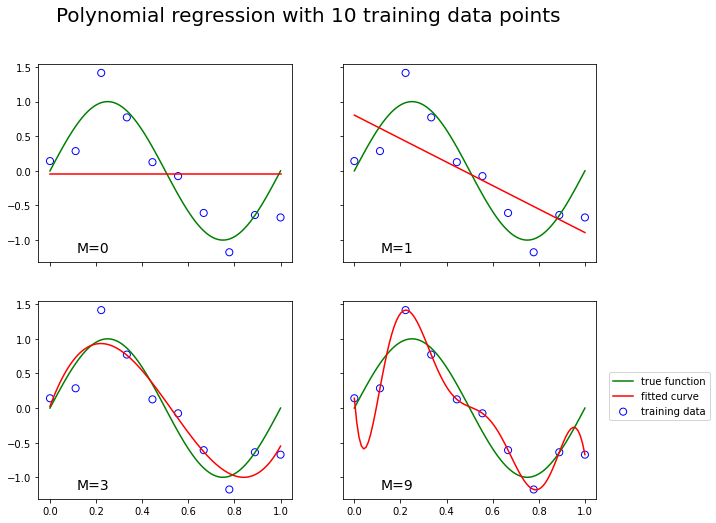

In [21]:
# make a graph with 2x2 subplots
fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(10, 8))
axs = axes.flatten()

# loop through fitting/plotting 0th, 1st, 3rd, and 9th order polynomials
for i, degree in enumerate([ 0, 1, 3, 9]):
    ax = axs[i]
    
    # your code to transform data from a single x variable into  
    # a design matrix (rows=data points, cols=features)
    # where the features are polynomial transforms of the x variable
    # with the polynomial being the type specified by the
    # loop variable `degree` 
    features = PolynomialFeatures(degree=degree) # instantiate feature transform object
    X_train = features.fit_transform(x_train) # transform x_train variable 
    X_predict = features.fit_transform(x_predict) # transform x_predict variable  
    model = LinearRegression(fit_intercept = False) # instantiate linear regression object (fit_intercept=??)
    model = model.fit(X_train, y_train) # fit the training set
    y_predict = model.predict(X_predict) # predict with the model using X_predict

    ax.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    ax.plot(x_predict, y_true, c="g", label="true function")
    ax.plot(x_predict, y_predict, c="r", label="fitted curve")
    ax.annotate("M={}".format(degree), xy=(.15, .05),  xycoords='axes fraction', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.suptitle('Polynomial regression with 10 training data points',fontsize=20)
plt.show()

NameError: ignored

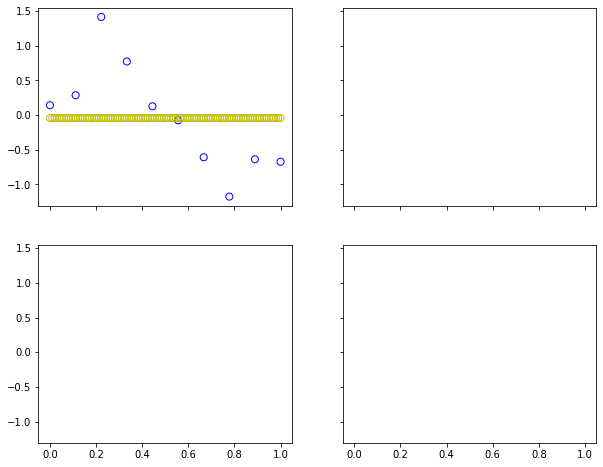

In [23]:
# OK let's draw 50 new random data points from the same underlying function as a validation set
x_validation, y_validation = create_toy_data(func, 50, sigma)
y_validation_true = func(x_validation)

fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(10, 8))
axs = axes.flatten()
for i, degree in enumerate([0, 1, 3, 9]):
    ax = axs[i]
 
    # your code to transform data from a single x variable into  
    # a design matrix (rows=data points, cols=features)
    # where the features are polynomial transforms of the x variable
    # with the polynomial being the type specified by the
    # loop variable `degree` 
    features = PolynomialFeatures(degree=degree) # instantiate feature transform object
    X_train = features.fit_transform(x_train) # transform x_train variable 
    X_predict = features.fit_transform(x_predict) # transform x_predict variable  
    model = LinearRegression(fit_intercept = False) # instantiate linear regression object (fit_intercept=??)
    model = model.fit(X_train, y_train) # fit the training set
    y_predict = model.predict(X_predict) # predict with the model using X_predict

    ax.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    ax.scatter(x_predict, y_predict, facecolor="none", edgecolor="y", s=50, label="validation data")
    ax.plot(x_predict, y, c="r", label="fitted curve")
    ax.annotate("M={}".format(degree), xy=(.15, .05),  xycoords='axes fraction', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()



In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

def mse(a,b):
    return np.mean(np.square(a - b))

def rss(a,b):
    return ((a-b).T.dot(a-b))[0]

# start with RSS, then see MSE/RMSE have same shape but are normalized against n of dataset
lossf = rmse
#*** differest rss

training_errors = []
validation_errors = []

# loop over polynomial features from degree 0 to degree 10
for i in range(10):
    feature = PolynomialFeatures(i)
    X_train = feature.fit_transform(x_train)
    X_validation = feature.fit_transform(x_validation) # 50 validation points drawn from same function

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)

    training_errors.append(lossf(model.predict(X_train), y_train))
    validation_errors.append(lossf(model.predict(X_validation), y_validation ))


plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(validation_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel(lossf.__name__.upper())
plt.title('with 10 training samples and 50 validation samples')
plt.show()

One technique that is often used to control the over-fitting phenomenon in such cases is that of **regularization**, which involves adding a penalty term to the error function below in order to discourage the coefficients from reaching large values. By preventing the sum of our weights from growing large, we are preventing complex fitting... the total amount of weight allowed will be preferentially allocated to the most important features, preventing features that have less effect on the answer from getting too much love from the algorithm.

The simplest such penalty term takes the form of a sum of squares of all of the coefficients, leading to a modified loss/error function of the form

$ L(\mathbf{w}) = (X\mathbf{w}-\mathbf{y})^T (X\mathbf{w}-\mathbf{y}) + {\lambda \over 2} \lVert \mathbf{w} \rVert_2 $

where the coefficient $\lambda$ governs the relative importance of the regularization term compared with the sum-of-squares error term and $\mathbf{X}$ is the (nxm) design matrix and $\mathbf{w}$ is an m long column vector and $\mathbf{y}$ is an n long column vector. 

There is a closed-form solution below:

$\mathbf{w}^* = (X^T X + \lambda I)^{-1} X^T y$

So you can plug that into numpy and get the same answer as the sklearn quickie below.   If you want to derive the closed form solution yourself, here's a hint:$ \lVert \mathbf{w} \rVert_2 = \mathbf{w}^T\mathbf{w}$


In [ ]:
 # L2 regularized least squares regression is called ridge regression or sometimes Tikhonov regularization
from sklearn.linear_model import Ridge

# only fitting 9th order
degree = 9

fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(10, 8))
axs = axes.flatten()
for i, lamda in enumerate([ 1e-1, 1e-3, 1e-6, 1e-9]):
    ax = axs[i]    
    
    feature = PolynomialFeatures(degree)
    X_train = feature.fit_transform(x_train)
    X_predict = feature.fit_transform(x_predict)

    model = Ridge(lamda,fit_intercept=False)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_predict)

    ax.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    ax.plot(x_predict, y_true, c="g", label="true function")
    ax.plot(x_predict, y_predict, c="r", label="fitted curve")
    ax.annotate("$m=9,\lambda$={:3.1e}".format(lmda), xy=(.15, .05),  xycoords='axes fraction', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.suptitle('9th order polynomial regression + L2 regularization',fontsize=20)
plt.show()



Now a few more words about various kinds of regularizations.  Ridge or L2 regularization is what we discussed above it has the form:
$$    L(\mathbf{w}) = (X\mathbf{w}-\mathbf{y})^T (X\mathbf{w}-\mathbf{y}) + {\lambda \over 2} \lVert \mathbf{w} \rVert_2 $$

You can also do L1 regularization which is often called LASSO regression (least absolute shrinkage and selection operator)
$$    L(\mathbf{w}) = (X\mathbf{w}-\mathbf{y})^T (X\mathbf{w}-\mathbf{y}) + {\lambda \over 2} \lVert \mathbf{w} \rVert_1 $$

And you can combine the two together in a technique called ElasticNet
$$    L(\mathbf{w}) = (X\mathbf{w}-\mathbf{y})^T (X\mathbf{w}-\mathbf{y}) + {\lambda \over 2} ( \alpha \lVert \mathbf{w} \rVert_1 + (1-\alpha) \lVert \mathbf{w} \rVert_2 ) $$

where $\alpha  \in [0,1]$ is a parameter dictating the proportion of L1 to L2 regularization.

Why all these different kinds of regularization? Well L1 tends to produce a *sparse* solution... many weights that are not important are driven towards 0.  You use this technique when it seems appropriate to you that less-important factors have no influence on the solution.  Whereas L2 limits the total amount of weight evenly, so less-important factors can continue to have less-influence-but-still-some-influence.

One application of L1 regularization: feature selection. Let's say you have data about the expression levels of ~27,000 protein coding genes across a few thousand humans, and you want to dermine if any of the genes have an effect on a disease.  Since almost NONE of them will, it's good to use something like a heavy L1 penalty, which will prevent you from picking up too much on random chance associations that may exist in the data.




lecture notes 1/23/23
- weight vector keep it to be small magnitudfe not changing direction
- regularization parameter, L1 norm regularizer 
- elastic net regression w L1/L2 trying to simultaneousl regularize.